In [63]:
import pandas as pd

# carga el archivo csv
df = pd.read_csv('insurance.csv')

# Mostrar el dataframe
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [64]:
null_values = df.isnull().sum()
null_values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [65]:
unique_counts = {column: df[column].nunique() for column in df.columns}
unique_counts

{'age': 47,
 'sex': 2,
 'bmi': 548,
 'children': 6,
 'smoker': 2,
 'region': 4,
 'charges': 1337}

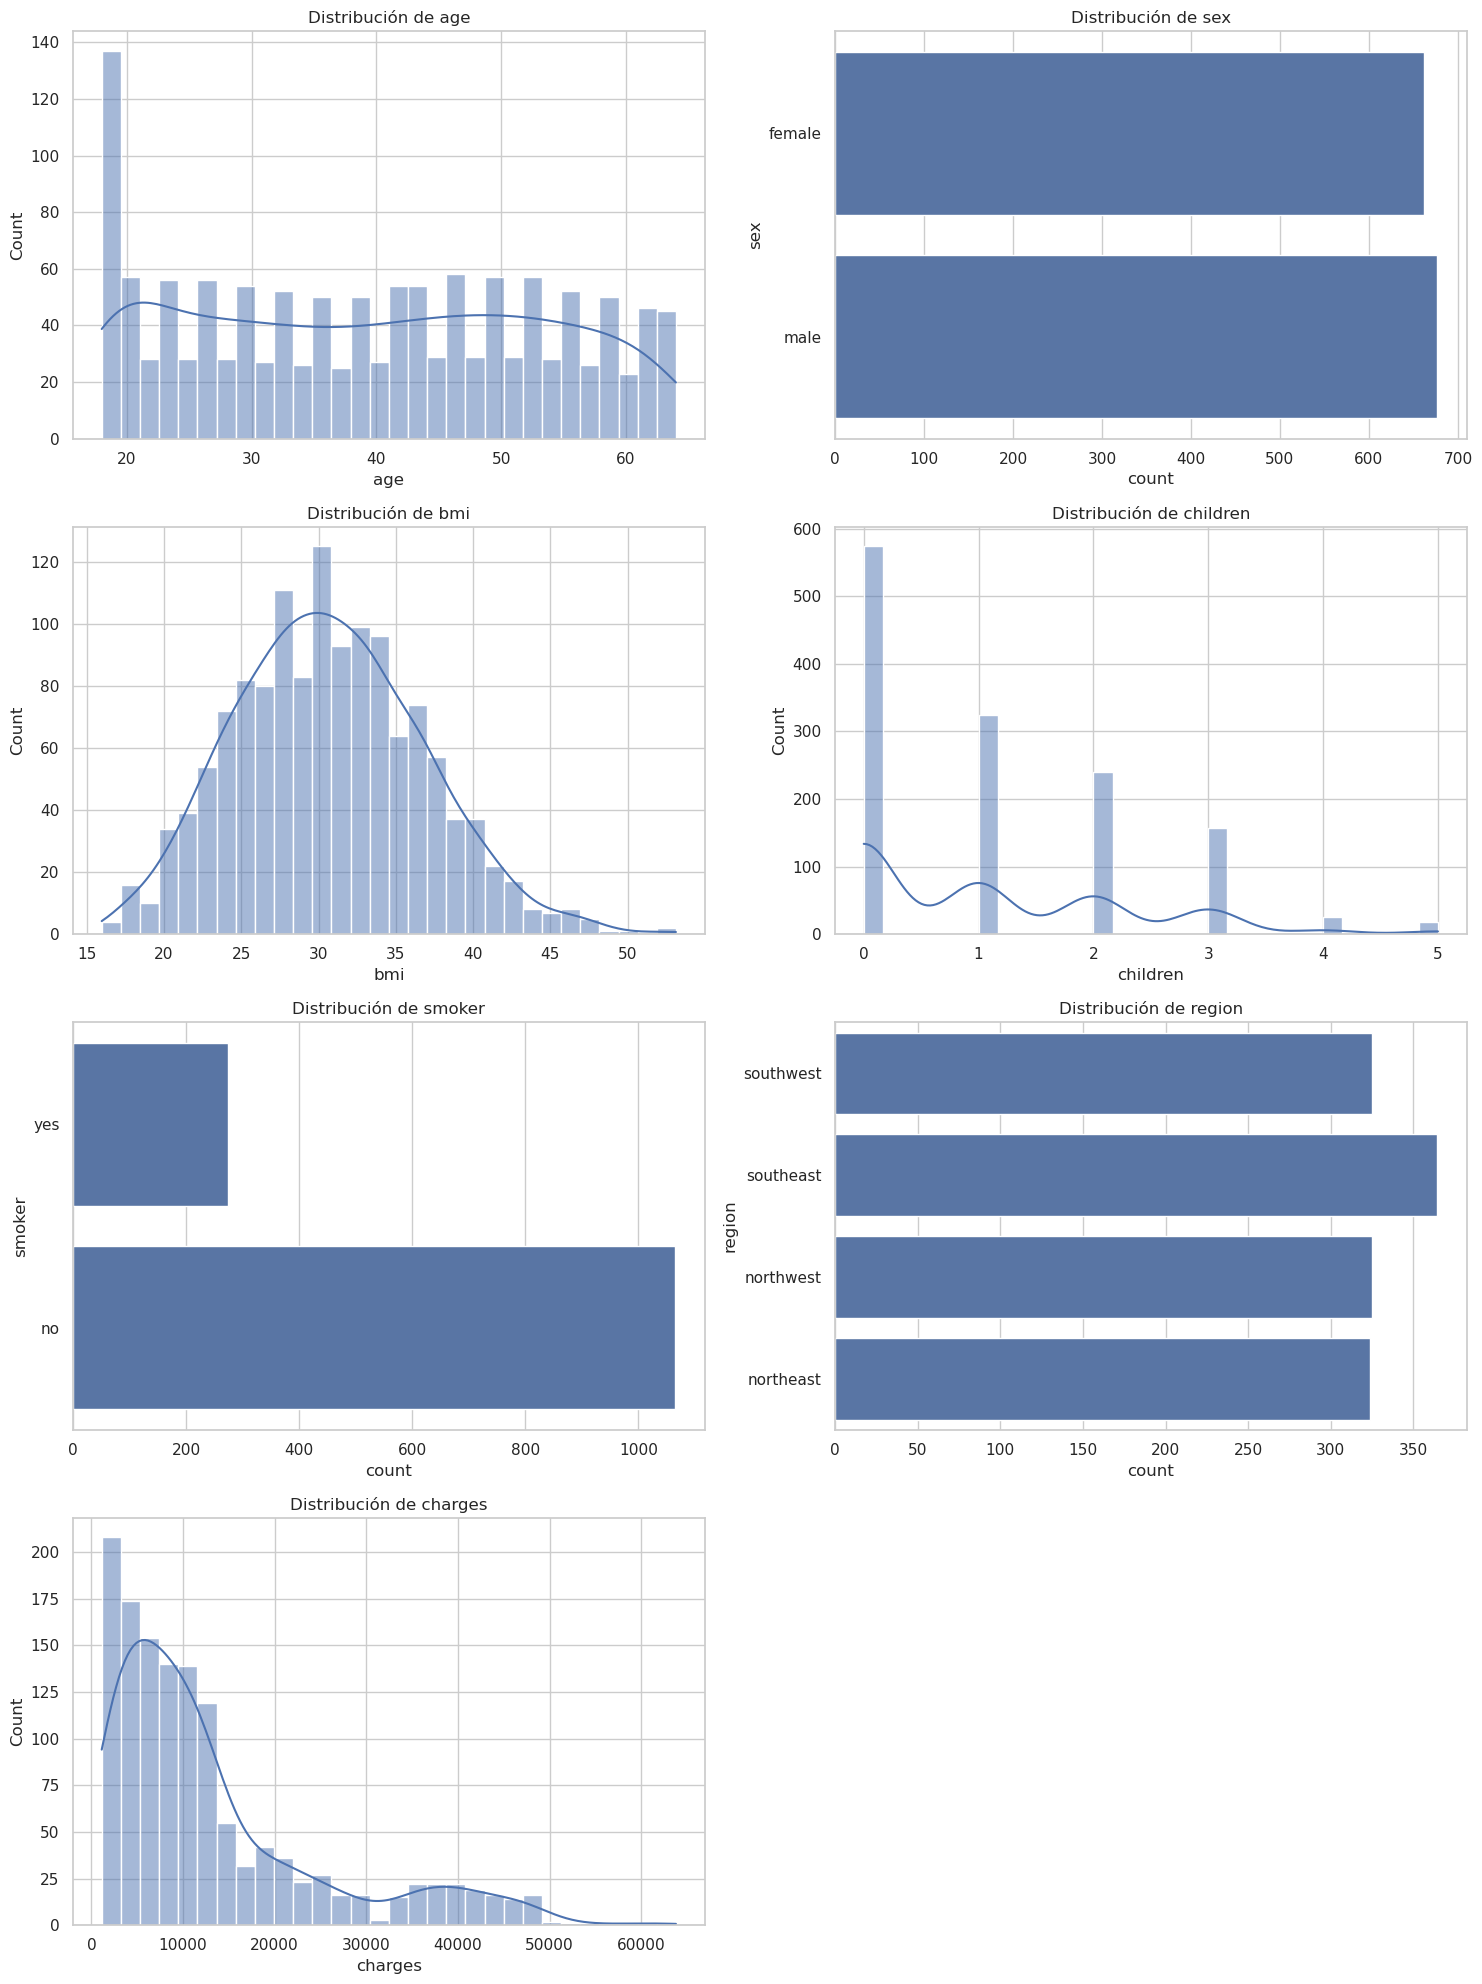

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set_style("whitegrid")

# Gráficos de distribución para todas las columnas
plt.figure(figsize=(15, 20))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 2, i)
    if df[col].dtype == 'object':
        sns.countplot(y=col, data=df)
    else:
        sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribución de {col}")
plt.tight_layout()
plt.show()


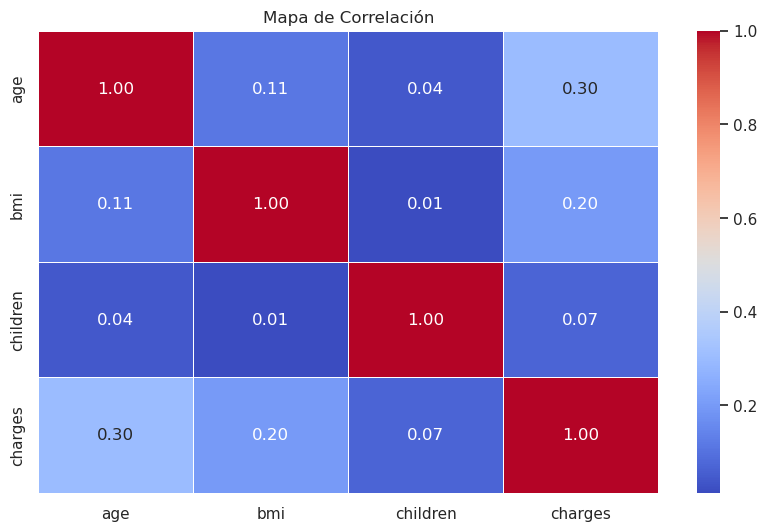

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que tu DataFrame se llama df
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlación")
plt.show()


In [ ]:
# Codificación de las variables categóricas
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True, dtype=int)
df_encoded



,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


### Conclusiones generales:

- La regresión lineal no se ve afectada por el escalado de los datos en este caso, ya que los resultados son prácticamente iguales. Esto puede ser normal porque la regresión lineal es un modelo relativamente simple que no suele depender fuertemente del escalado.

- El árbol de decisión muestra una ligera mejora con el escalado, lo que indica que este tipo de modelo se beneficia de las variables numéricas en un rango similar. Sin embargo, el rendimiento sigue siendo aceptable incluso sin escalado, lo que es característico de este tipo de modelos, que no dependen tanto de la escala de las características.

- La red neuronal tiene un rendimiento mucho peor, especialmente sin escalado. Esto muestra que el escalado de las variables es crucial para las redes neuronales, ya que los modelos no escalados pueden sufrir de un mal ajuste o incluso un mal rendimiento. Sin embargo, la red neuronal no parece estar funcionando adecuadamente, incluso con escalado, lo que podría ser una señal de que se necesitan ajustes adicionales (por ejemplo, ajustando la arquitectura de la red, la función de activación, el número de épocas de entrenamiento, o utilizando regularización).